In [1]:
import pandas as pd
import numpy as np
import collections
import copy
import matplotlib.pyplot as plt
from nlp.preprocessing import (
    clean_text,
    preprocess,
    tokenize,
    preprocess_document,
    tokenize_document,
    get_stopwords)
from nlp.text_statistics import (
    number_tokens,
    tokens_length,
    unique_tokens,
    count_numbers,
    number_stopwords,
    print_statistics,
    count_bigrams)
from nlp.grouping import (
    get_groups,
    get_groups_size,
    get_bigram_groups,
    get_first_two_groups,
    groups_frequency_sort
)
from item.item_list import (
    ItemList,
    Item)
from nlp.utils import (
    plot_histogram)
from gensim.parsing.preprocessing import (
    strip_multiple_whitespaces,
    strip_non_alphanum,
    strip_punctuation2,
    strip_short)

In [2]:
itemlist = ItemList()
itemlist.load_items_from_file('../dados/items_preprocessed.zip')

In [3]:
len(itemlist.items_list)

1508992

In [4]:
items_list = itemlist.items_list

In [5]:
items_list[691656].print_item()

{'palavras': ['peca', 'ripa', 'linear'], 'unidades_medida': [], 'números': [], 'cores': [], 'materiais': ['madeira'], 'tamanho': [], 'quantidade': [], 'preço': 2.3, 'dsc_unidade_medida': 'metro'}


In [6]:
items_words = []

for item in items_list:
    item_dict = item.get_item_dict()
    items_words.append(item_dict['palavras'])
    
items_descriptions = items_words

In [4]:
file_recurso = '/Users/Pedro/Desktop/projeto-mp/dados/licitacao_vlr_recurso_funcao.csv'
data_recurso = pd.read_csv(file_recurso, sep=';')

In [5]:
data_recurso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256084 entries, 0 to 256083
Data columns (total 6 columns):
seq_dim_licitacao         256084 non-null int64
vlr_licitacao             249743 non-null float64
nom_funcao                256084 non-null object
sum_vlr_recurso_funcao    256084 non-null float64
sum_vlr_recurso           256084 non-null float64
proporcao_vlr             256084 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 11.7+ MB


In [6]:
licitacoes_saude = data_recurso.loc[(data_recurso['nom_funcao'] == 'Saúde') & (data_recurso['proporcao_vlr'] >= 5.0)]

In [7]:
seq_dim_licitacao_list = list(licitacoes_saude['seq_dim_licitacao'])

In [8]:
len(set(seq_dim_licitacao_list))

47566

In [9]:
file = '/Users/Pedro/Desktop/projeto-mp/dados/itens_pregao_pitem_saude.csv'
data = pd.read_csv(file, sep=';')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728629 entries, 0 to 1728628
Data columns (total 11 columns):
seq_dim_licitacao          int64
num_exercicio              int64
nom_entidade               object
seq_dim_item               int64
nom_item                   object
dsc_unidade_medida         object
nom_item_busca             object
vlr_quantidade             float64
vlr_unitario_homologado    float64
nom_funcao                 object
vlr_licitacao              float64
dtypes: float64(3), int64(3), object(5)
memory usage: 145.1+ MB


In [10]:
data = data.loc[data['seq_dim_licitacao'].isin(seq_dim_licitacao_list)]

In [11]:
len(set(list(data['seq_dim_licitacao'])))

34795

In [12]:
items = list(data['nom_item'])
len(items)

1530592

In [13]:
len(set(items))

894693

In [14]:
items_descriptions = preprocess(items, True, False, True)

In [15]:
len(items_descriptions)

1530592

In [8]:
bigrams_count = count_bigrams(items_descriptions)

In [9]:
bigrams = get_bigram_groups(items_descriptions, bigrams_count)

In [10]:
bigrams_groups = get_groups(bigrams)

In [11]:
len(bigrams_groups)

97973

In [32]:
group_sample = []

for group, size in bigrams_groups.items():
    if size > 5000:
        group_sample.append(group)
        
group_sample[:10]

[('alto', 'rotacao'),
 ('solucao', 'injetavel'),
 ('saco', 'lixo'),
 ('materia', 'primo'),
 ('data', 'fabricacao'),
 ('filtro', 'ar'),
 ('camara', 'ar')]

In [13]:
bigrams_groups_size = get_groups_size(bigrams_groups)

In [14]:
bigrams_groups_size.count(1)

38508

In [15]:
bigrams_groups_names_size = groups_frequency_sort(bigrams_groups)

In [16]:
bigrams_groups_names_size[:10]

[(('filtro', 'ar'), 6594),
 (('materia', 'primo'), 6485),
 (('camara', 'ar'), 6022),
 (('saco', 'lixo'), 5925),
 (('data', 'fabricacao'), 5796),
 (('solucao', 'injetavel'), 5251),
 (('alto', 'rotacao'), 5106),
 (('fita', 'adesivo'), 4749),
 ('pneu', 4741),
 (('luva', 'procedimento'), 4660)]

In [17]:
print_statistics(bigrams_groups_size)

Mean: 15.38866830657426
First quartile: 1.0
Median: 2.0
Third quartile: 5.0
Std: 105.98660226342031
Var: 11233.159859344452
Max: 6594
Min: 1.0


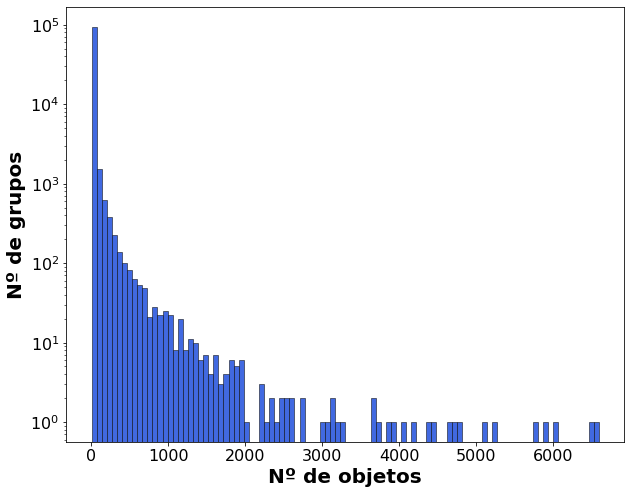

<Figure size 432x288 with 0 Axes>

In [18]:
plot_histogram(bigrams_groups_size, 100, 'Nº de objetos', 'Nº de grupos', log=True)

In [19]:
count_interval = {}
count_interval['1'] = 0
count_interval['(1,5]'] = 0
count_interval['(5,10]'] = 0
count_interval['(10,100]'] = 0
count_interval['(100,1000]'] = 0
count_interval['(1000,5000]'] = 0
count_interval['>5000'] = 0

In [20]:
for p in bigrams_groups_size:

    if p == 1:
        count_interval['1'] += 1
    elif p > 1 and p <= 5:
        count_interval['(1,5]'] += 1
    elif p > 5 and p <= 10:
        count_interval['(5,10]'] += 1
    elif p > 10 and p <= 100:
        count_interval['(10,100]'] += 1
    elif p > 100 and p <= 1000:
        count_interval['(100,1000]'] += 1
    elif p > 1000 and p <= 5000:
        count_interval['(1000,5000]'] += 1
    else:
        count_interval['>5000'] += 1

In [21]:
total = 0
lines = []
aux = 0
for interval, value in count_interval.items():
    print(interval, ':', value, 100*float(value)/len(bigrams_groups))
    for i in range(0, value):
        lines.append([interval])
        aux += 1
    total += value

1 : 38508 39.30470639870168
(1,5] : 36796 37.55728619109347
(5,10] : 8587 8.764659651128373
(10,100] : 11609 11.849182938156432
(100,1000] : 2311 2.3588131423963743
(1000,5000] : 155 0.15820685290845438
>5000 : 7 0.00714482561522052


In [22]:
intervals_df = pd.DataFrame(lines, columns=["Preço"])
intervals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97973 entries, 0 to 97972
Data columns (total 1 columns):
Preço    97973 non-null object
dtypes: object(1)
memory usage: 765.5+ KB


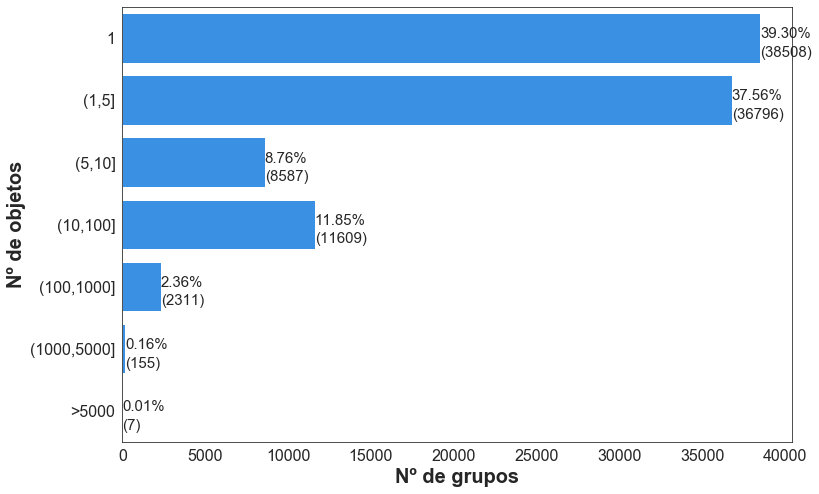

<Figure size 432x288 with 0 Axes>

In [23]:
import seaborn as sns
sns.set_style("white")

fig, (axis1) = plt.subplots(figsize=(12,8))

sns.countplot(y="Preço", data=intervals_df, color='dodgerblue')

axis1.set_xlabel("Nº de grupos", fontsize=20, weight='bold')
axis1.set_ylabel("Nº de objetos", fontsize=20, weight='bold')
plt.grid(False)

total = len(intervals_df)
for p in axis1.patches:
    width = p.get_width()
    axis1.text(width, p.get_y()+0.7, '(%d)'%(width), fontsize=15)
    axis1.text(width, p.get_y()+0.4, '%.2f%%'%(100*float(width)/total), fontsize=15)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()
plt.clf()

In [33]:
two_tokens = get_first_two_groups(items_descriptions)

In [34]:
two_tokens_groups = get_groups(two_tokens)

In [35]:
len(two_tokens_groups)

121469

In [55]:
group_sample = []

for group, size in two_tokens_groups.items():
    if size > 5000:
        group_sample.append(group)

group_sample[:10]

[('broca', 'diamantado'), ('saco', 'lixo'), ('filtro', 'ar'), ('camara', 'ar')]

In [51]:
twot_groups_size = get_groups_size(two_tokens_groups)

In [38]:
twot_groups_size.count(1)

49318

In [39]:
twot_groups_names_size = groups_frequency_sort(two_tokens_groups)

In [40]:
twot_groups_names_size[:10]

[(('filtro', 'ar'), 6236),
 (('saco', 'lixo'), 5867),
 (('camara', 'ar'), 5498),
 (('broca', 'diamantado'), 5332),
 (('luva', 'procedimento'), 4907),
 ('pneu', 4741),
 (('fita', 'adesivo'), 4182),
 (('sonda', 'uretral'), 4174),
 (('lamina', 'bisturi'), 3869),
 (('tubo', 'endotraqueal'), 3740)]

In [41]:
print_statistics(twot_groups_size)

Mean: 12.412006355531041
First quartile: 1.0
Median: 2.0
Third quartile: 5.0
Std: 80.93585448300799
Var: 6550.612540894644
Max: 6236
Min: 1.0


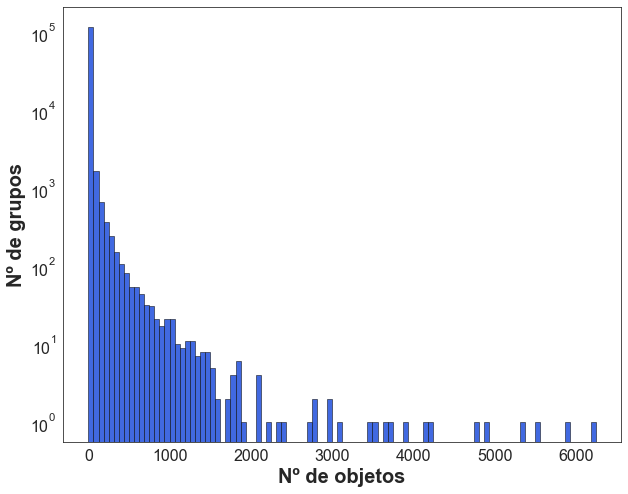

<Figure size 432x288 with 0 Axes>

In [42]:
plot_histogram(twot_groups_size, 100, 'Nº de objetos', 'Nº de grupos', log=True)

In [43]:
count_interval = {}
count_interval['1'] = 0
count_interval['(1,5]'] = 0
count_interval['(5,10]'] = 0
count_interval['(10,100]'] = 0
count_interval['(100,1000]'] = 0
count_interval['(1000,5000]'] = 0
count_interval['>5000'] = 0

In [44]:
for p in twot_groups_size:

    if p == 1:
        count_interval['1'] += 1
    elif p > 1 and p <= 5:
        count_interval['(1,5]'] += 1
    elif p > 5 and p <= 10:
        count_interval['(5,10]'] += 1
    elif p > 10 and p <= 100:
        count_interval['(10,100]'] += 1
    elif p > 100 and p <= 1000:
        count_interval['(100,1000]'] += 1
    elif p > 1000 and p <= 5000:
        count_interval['(1000,5000]'] += 1
    else:
        count_interval['>5000'] += 1

In [45]:
total = 0
lines = []
aux = 0
for interval, value in count_interval.items():
    print(interval, ':', value, 100*float(value)/len(two_tokens_groups))
    for i in range(0, value):
        lines.append([interval])
        aux += 1
    total += value

1 : 49318 40.60130568293145
(1,5] : 45511 37.467172694267674
(5,10] : 10629 8.750380755583729
(10,100] : 13538 11.145230470325762
(100,1000] : 2344 1.9297104611053026
(1000,5000] : 125 0.10290691452140052
>5000 : 4 0.0032930212646848167


In [46]:
intervals_df = pd.DataFrame(lines, columns=["Preço"])
intervals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121469 entries, 0 to 121468
Data columns (total 1 columns):
Preço    121469 non-null object
dtypes: object(1)
memory usage: 949.1+ KB


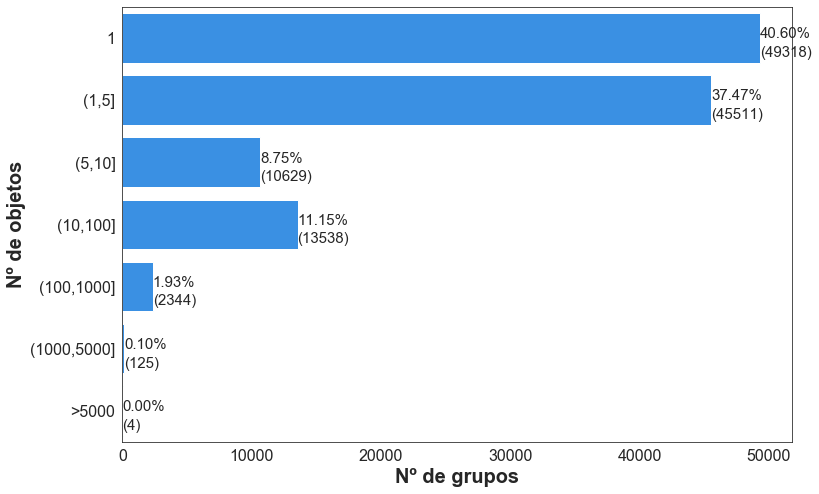

<Figure size 432x288 with 0 Axes>

In [47]:
import seaborn as sns
sns.set_style("white")

fig, (axis1) = plt.subplots(figsize=(12,8))

sns.countplot(y="Preço", data=intervals_df, color='dodgerblue')

axis1.set_xlabel("Nº de grupos", fontsize=20, weight='bold')
axis1.set_ylabel("Nº de objetos", fontsize=20, weight='bold')
plt.grid(False)

total = len(intervals_df)
for p in axis1.patches:
    width = p.get_width()
    axis1.text(width, p.get_y()+0.7, '(%d)'%(width), fontsize=15)
    axis1.text(width, p.get_y()+0.4, '%.2f%%'%(100*float(width)/total), fontsize=15)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()
plt.clf()

In [ ]:
data2 = data[['nom_item', 'vlr_unitario_homologado']]
data2.info()

In [ ]:
items_prices = data2.values.tolist()

In [ ]:
tuples = []

for l in items_prices :
    tuples.append((l[0], l[1]))

In [ ]:
items_prices = list(tuples)

In [ ]:
len(items_prices)

In [ ]:
items_descriptions_prices = []

for i in range(0, len(items_prices)):
    items_descriptions_prices.append((items_descriptions[i], items_prices[i][1]))

In [ ]:
len(items_descriptions_prices)

In [ ]:
groups_prices = collections.defaultdict(list)

for description, price in items_descriptions_prices:
    doc_tokenized = description
    if len(doc_tokenized) == 1 and price != 0:
        groups_prices[doc_tokenized[0]].append(price)
    elif len(doc_tokenized) >= 2 and price != 0:
        groups_prices[(doc_tokenized[0], doc_tokenized[1])].append(price)

In [ ]:
len(groups_prices)

In [ ]:
twot_groups_names_size[:10]

In [ ]:
for group in twot_groups_names_size[:10]:
    print(group[0], ":", len(groups_prices[group[0]]))

In [ ]:
for group in twot_groups_names_size[:10]:
    print(group[0])
    print_statistics(groups_prices[group[0]])